In [1]:
import numpy as np
from matplotlib import pyplot as plt

from qiskit import *
from qiskit.visualization import plot_histogram

from qiskit.circuit.library import RealAmplitudes




#######################################
def build_rycnot(n, depth, params):
    """RY CNOT ansaztz"""
    
    if len(params) != n*depth:
        print("ERROR!")
        sys.exit()

    ansatz = RealAmplitudes(n, entanglement='linear', reps=int(depth)-1 , insert_barriers =True)

    if len(params) == ansatz.num_parameters_settable:
        ansatz.ordered_parameters = params
    else:
        print('ERROR!')
        sys.exit()

    return ansatz

#from shots counts to distribution
def find_distribution(n, counts, NSHOTS):
    
    #yes this is exponentially costly written like that..

    N = 1<<n
    distr = {}
    for n in range(N):
        try:
            distr[n] = counts[n]
        except:
            distr[n] = 0
    return distr

def qasm_distribution(n, par, NSHOTS = 1e4):
    """execute the circuit and return the dictionary with the counts"""
    """ NSHOTS is the number to be varied """
    
    N = 1<<n
   
    qc = QuantumCircuit(n)
    
    
    depth = int(len(par)/n)
    
    ansatz = build_rycnot(n, depth, par)
    qc.compose(ansatz, inplace = True)
    qc.measure_all()

    #backend definition and run
    backend = Aer.get_backend('qasm_simulator')
    qcc = transpile(qc, backend)
    counts = backend.run(qcc, shots = NSHOTS).result().get_counts()
    
    #coversion from counts "000010" label into integer j label (binary)
    int_counts = counts.int_outcomes()
    
    #create normalized histogram
    pos = find_distribution(n, int_counts, NSHOTS)

    return pos

{0: 3298, 1: 178, 2: 5, 3: 552, 4: 388, 5: 1095, 6: 0, 7: 382, 8: 72, 9: 8, 10: 121, 11: 1709, 12: 156, 13: 880, 14: 161, 15: 995}


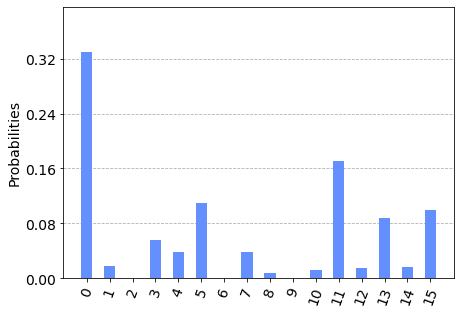

In [2]:
#main for this part


n = 4
par = np.random.rand(5*4)
pos = qasm_distribution(n, par)

print(pos)

plot_histogram(pos, bar_labels = False)

In [ ]:
### NEXT STEPS

###this is pseudocode!!!

# likely needs these functions...

def energy_from_int( j):
    
    '''from integer label of the hilbert space to energy'''
    
    '''
    this place likely contains conversion back from integer to "0010001"
    and perform local operation to find the energy of this bit string assuming that
    these 1 and 0 have some physical meaning
    '''
    
    return energy


def energy_from_full_dist( pos):
    
    '''
    ensum= 0
    for j in  elements of pos
    ensum += energy_from_int( j)
    
    '''

    return ensum


######
# create a big wrapper that includes all the above to be fed into scipy


def cost_function( params, additional...
                 
    '''from circuit parameters to cost function'''
              
    '''include something like'''
    

    pos = qasm_distribution(n, params)
    cost_function = energy_from_full_dist( pos)
                  
                  
    return cost_function


In [ ]:
###
#all this should be wrapped into something like

from scipy.optimize import minimize

'''
all systems variables..
n,
depth, ...
maxiter...
nshots..
'''


result = minimize(cost_function, param, args=(...al additional subroutine params),
                            method='COBYLA',tol=1e-6, options={'maxiter':maxiter} )